# Support Vector Machines

## References

* http://cs229.stanford.edu/notes/cs229-notes3.pdf
* https://www.youtube.com/watch?v=_PwhiWxHK8o
* http://scikit-learn.org/stable/modules/svm.html


In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from matplotlib import colors
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [129]:
pylab.rcParams['figure.figsize'] = (10, 8)
pylab.rcParams['contour.negative_linestyle'] = 'solid'

# Toy Datasets

In [130]:
X = np.array([[0.5, 2], [1, 1], [1, 3], [3, 1], [3, 3], [3.5, 2]])
y = np.array([1, 1., 1., -1., -1., -1.])

In [131]:
clf = SVC(kernel='linear', C = 1)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [132]:
clf.decision_function(X)

array([ 1.5,  1. ,  1. , -1. , -1. , -1.5])

In [140]:
def plot_decision_countour(X, y, clf):
    nx = ny = 200
    x_min, y_min = np.round(np.min(X, axis=0)) - 1
    x_max, y_max = np.round(np.max(X, axis=0)) + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    D=np.c_[xx.ravel(), yy.ravel()]
    p=clf.decision_function(D)
    print(np.max(p))
    print(np.min(p))
    p=p.reshape(xx.shape)
    plt.pcolormesh(xx, yy, p, cmap='RdBu',
                       norm=colors.Normalize(-2, 2))

    for i in range(len(X)):
        if y[i] == 1:
            plt.plot(X[i][0], X[i][1], 'o', color='blue', markersize=10)
        else:
            plt.plot(X[i][0], X[i][1], 's', color='red', markersize=10)

    plt.contour(xx, yy, p, [0], linewidths=2., colors='k')
    plt.contour(xx, yy, p, [1], linewidths=2., colors='b')
    plt.contour(xx, yy, p, [-1], linewidths=2., colors='r')

3.0000000000000004
-3.0000000000000018


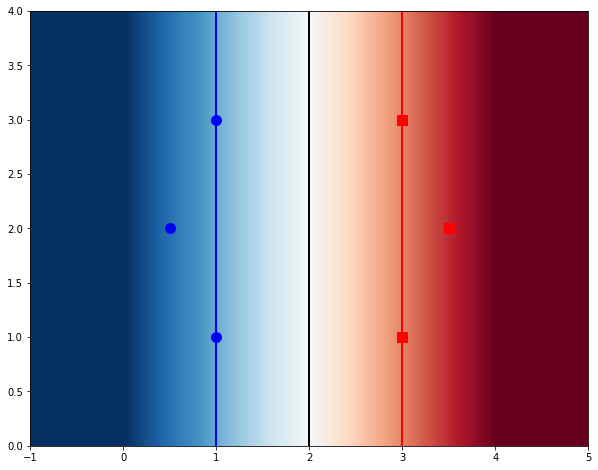

In [141]:
plot_decision_countour(X, y, clf)

In [142]:
clf.support_vectors_

array([[3., 1.],
       [3., 3.],
       [1., 1.],
       [1., 3.]])

In [143]:
clf.dual_coef_

array([[-0.22413793, -0.27586207,  0.22413793,  0.27586207]])

In [144]:
np.sum(clf.dual_coef_)

0.0

In [145]:
clf.coef_

array([[-1.,  0.]])

In [146]:
np.sum(clf.dual_coef_.reshape(-1, 1)*clf.support_vectors_, axis=0)

array([-1.,  0.])

In [147]:
clf.intercept_

array([2.])

In [148]:
X = np.array([[1, 1], [1, 3], [3, 1], [3, 3]])
y = np.array([1., -1., -1., 1.])

In [149]:
clf = SVC(kernel='linear', C = 1)
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

3.552713678800501e-15
-3.552713678800501e-15


c:\users\mbilg\appdata\local\programs\python\python35\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


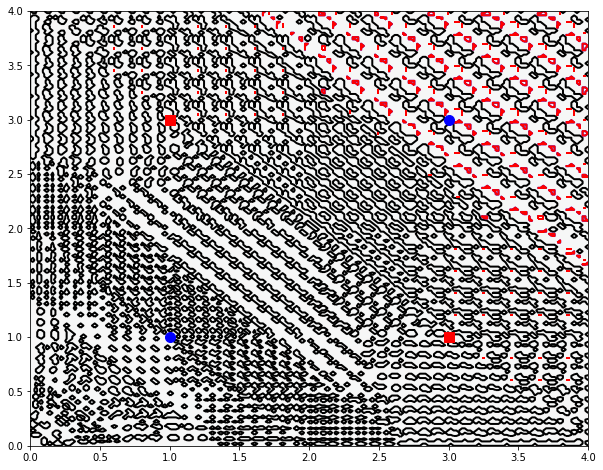

In [150]:
plot_decision_countour(X, y, clf)

In [151]:
clf = SVC(kernel='rbf', C = 10, gamma=0.35)
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.35, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

1.1652993584963558
-1.1652993584963554


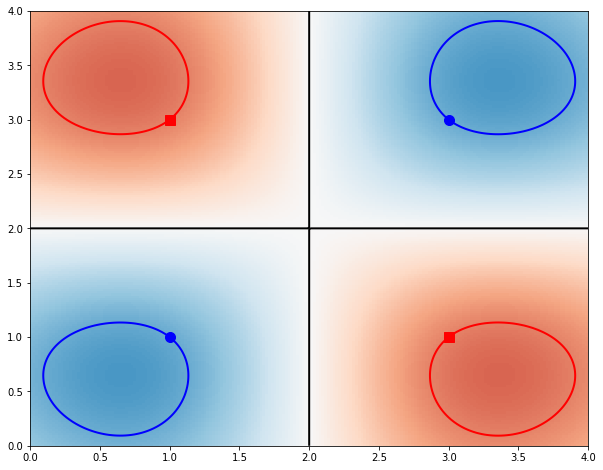

In [152]:
plot_decision_countour(X, y, clf)

In [153]:
clf.decision_function(X)

array([ 0.99971967, -0.99971967, -0.99999999,  0.99999999])

In [154]:
clf.decision_function([[3, 1]])

array([-0.99999999])

In [155]:
clf.decision_function([[3.2, 0.75]])

array([-1.14256638])

In [156]:
clf.support_vectors_

array([[1., 3.],
       [3., 1.],
       [1., 1.],
       [3., 3.]])

In [157]:
clf.dual_coef_

array([[-1.76135783, -1.7616563 ,  1.76135783,  1.7616563 ]])

In [158]:
clf.coef_

AttributeError: coef_ is only available when using a linear kernel

In [159]:
X = np.array([[0.5, 2], [1, 1], [1, 3], [3, 1], [3, 3], [3.5, 2]])
y = np.array([1, 1., 1., -1., -1., -1.])

In [160]:
clf = SVC(kernel='rbf', C = 10, gamma=0.15)
clf.fit(X, y)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.15, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

1.4839999307723228
-1.4839999307723226


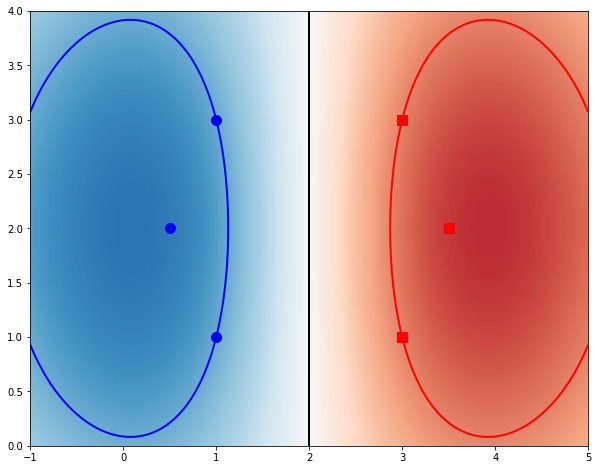

In [161]:
plot_decision_countour(X, y, clf)

In [162]:
clf.support_vectors_

array([[3., 1.],
       [3., 3.],
       [1., 1.],
       [1., 3.]])

# MNIST Data

In [163]:
from sklearn.datasets import fetch_openml

In [164]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [165]:
X.shape

(70000, 784)

In [166]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [167]:
subclasses = ['3', '8']

chosen_bool = np.full((X.shape[0], ), False)

for sc in subclasses:
    chosen_bool = np.logical_or(chosen_bool, y==sc)

X = X[chosen_bool]
y = y[chosen_bool]

In [168]:
X.shape

(13966, 784)

In [169]:
np.unique(y)

array(['3', '8'], dtype=object)

In [170]:
y[y=='3'] = 0
y[y=='8'] = 1
y = np.asarray(y, dtype=int)

In [171]:
np.unique(y)

array([0, 1])

In [172]:
rs = np.random.RandomState(42)
shuffle = rs.permutation(X.shape[0])
X = X[shuffle]
y = y[shuffle]

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 200, test_size=X.shape[0]-200)

In [249]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [250]:
lr = LogisticRegression(solver='liblinear', multi_class='auto', penalty='l2', C=1)

In [251]:
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

1.0
0.9356385297108819


In [252]:
svm = SVC(kernel='rbf', gamma='scale', C=1)
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(svm.score(X_test, y_test))

0.995
0.9015690832485834


In [253]:
from sklearn.decomposition import PCA

In [254]:
pca = PCA(n_components=2)
Xtrp = pca.fit_transform(X_train)
Xtep = pca.transform(X_test)

In [255]:
lr.fit(Xtrp, y_train)
print(lr.score(Xtrp, y_train))
print(lr.score(Xtep, y_test))

0.825
0.8428737469126835


In [270]:
svm = SVC(kernel='rbf', gamma='scale', C=1)
svm.fit(Xtrp, y_train)
print(svm.score(Xtrp, y_train))
print(svm.score(Xtep, y_test))

0.855
0.8505738776696208


1.343818262351658
-1.151655472925516


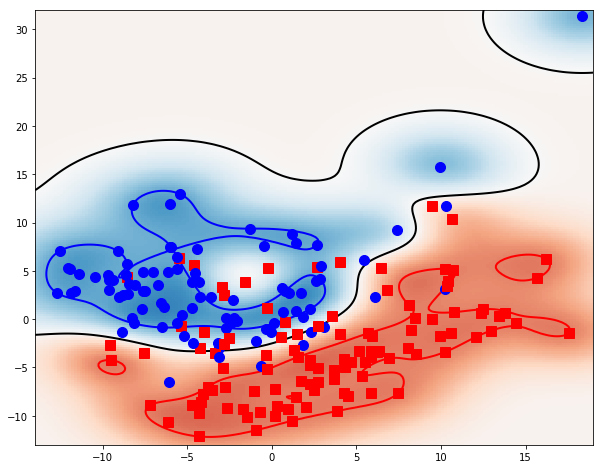

In [271]:
plot_decision_countour(Xtrp, y_train, svm)

# IMDB Data

In [40]:
import codecs
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
with open("data/imdb.pickle.z", 'rb') as f:
    compressed_data = f.read()

uncompressed_data = codecs.decode(compressed_data, 'zlib_codec')
imdb_data = pickle.loads(uncompressed_data)

In [42]:
tp = r"(?u)\b[\w\'/]+\b"
vect = CountVectorizer(token_pattern=tp, lowercase=True, ngram_range=(1, 1), min_df=10, max_df=0.7, binary=True)

In [43]:
X_train = vect.fit_transform(imdb_data['train_corpus'])

In [44]:
X_test = vect.transform(imdb_data['test_corpus'])

In [45]:
y_train = imdb_data['y_train']
y_test = imdb_data['y_test']

In [46]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
s = SVC(kernel=cosine_similarity)
s.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel=<function cosine_similarity at 0x0000024D8C488400>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [48]:
print(s.score(X_train, y_train))
print(s.score(X_test, y_test))

0.93508
0.88728


In [49]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

In [50]:
bn = BernoulliNB()
mnb = MultinomialNB()
lrl2 = LogisticRegression(solver='liblinear', penalty='l2')
lrl1 = LogisticRegression(solver='liblinear', penalty='l1')
clfs = [bn, mnb, lrl2, lrl1]

In [51]:
for clf in clfs:
    clf.fit(X_train, y_train)
    print(clf)
    print(clf.score(X_train, y_train))
    print(clf.score(X_test, y_test))
    print()

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.88056
0.8382

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.88232
0.83788

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
0.9964
0.87208

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
0.98124
0.8722

